### -- Ritvik Kharkar 3/31/2017 --

# Tools We'll Need

In [220]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import pearsonr

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression, ElasticNet, Lars, Huber

from sklearn.preprocessing import normalize
from sklearn.grid_search import ParameterGrid
from sklearn import metrics

from datetime import datetime
import itertools

# What Does Our Data Look Like?

In [221]:
# Data Source: biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3.xls
# Save as 'titanic.csv'
titanic_df = pd.read_csv('titanic.csv')

In [222]:
# Randomly sort the data, this'll be important later on
titanic_df = titanic_df.sample(frac = 1)

In [223]:
titanic_df.reset_index(drop=True, inplace=True)

In [224]:
titanic_df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,2.0,1.0,"West, Miss. Barbara J",female,0.9167,1.0,2.0,C.A. 34651,27.7500,NaN,S,10,NaN,"Bournmouth, England"
1,3.0,0.0,"MacKay, Mr. George William",male,NaN,0.0,0.0,C.A. 42795,7.5500,NaN,S,NaN,NaN,NaN
2,1.0,0.0,"Nicholson, Mr. Arthur Ernest",male,64.0000,0.0,0.0,693,26.0000,NaN,S,NaN,263.0,"Isle of Wight, England"
3,3.0,0.0,"Mahon, Mr. John",male,NaN,0.0,0.0,AQ/4 3130,7.7500,NaN,Q,NaN,NaN,NaN
4,2.0,0.0,"Lahtinen, Rev. William",male,30.0000,1.0,1.0,250651,26.0000,NaN,S,NaN,NaN,"Minneapolis, MN"
5,3.0,0.0,"Dantcheff, Mr. Ristiu",male,25.0000,0.0,0.0,349203,7.8958,NaN,S,NaN,NaN,"Bulgaria Chicago, IL"
6,3.0,0.0,"Matinoff, Mr. Nicola",male,NaN,0.0,0.0,349255,7.8958,NaN,C,NaN,NaN,NaN
7,3.0,0.0,"Connolly, Miss. Kate",female,30.0000,0.0,0.0,330972,7.6292,NaN,Q,NaN,NaN,Ireland
8,3.0,0.0,"Olsen, Mr. Henry Margido",male,28.0000,0.0,0.0,C 4001,22.5250,NaN,S,NaN,173.0,NaN
9,2.0,0.0,"Davies, Mr. Charles Henry",male,18.0000,0.0,0.0,S.O.C. 14879,73.5000,NaN,S,NaN,NaN,"Lyndhurst, England"


# Clean the dataset

In [225]:
#Select a subset of the columns
titanic_df = titanic_df[['pclass', 'survived', 'sex', 'age', 'fare']]

In [226]:
#Fill the NaN with -1
titanic_df.fillna(-1, inplace = True)

In [227]:
#A dictionary in python
sex_dict = {'male': 0, 'female': 1, -1: -1}

In [228]:
#Our first look at the magic of "apply"
titanic_df.sex = titanic_df.sex.apply(lambda x: sex_dict[x])

In [229]:
#How bad is our missing data situation?
for field in titanic_df.columns:
    print field, sum(titanic_df[field] == -1)

pclass 1
survived 1
sex 1
age 264
fare 2


In [230]:
#Is the fact that age is not reported relevant?
no_age_df = titanic_df[titanic_df.age == -1]
yes_age_df = titanic_df[titanic_df.age != -1]

In [231]:
for field in ['fare', 'sex', 'survived', 'pclass']:
    print field
    print 'Missing Age: ', no_age_df[field].mean()
    print 'Present Age: ', yes_age_df[field].mean()

fare
Missing Age:  19.7444431818
Present Age:  36.6500515296
sex
Missing Age:  0.291666666667
Present Age:  0.370936902486
survived
Missing Age:  0.272727272727
Present Age:  0.408221797323
pclass
Missing Age:  2.62878787879
Present Age:  2.20745697897


In [232]:
#Make a decision about what to do about NaN
titanic_df = titanic_df[(titanic_df.age != -1)&(titanic_df.survived != -1)&(titanic_df.sex != -1)&(titanic_df.fare != -1)&(titanic_df.pclass != -1)]

#More Elegant
#titanic_df = titanic_df[(titanic_df.T != -1).all()]

In [233]:
titanic_df

,pclass,survived,sex,age,fare
0,2.0,1.0,1,0.9167,27.7500
2,1.0,0.0,0,64.0000,26.0000
4,2.0,0.0,0,30.0000,26.0000
5,3.0,0.0,0,25.0000,7.8958
7,3.0,0.0,1,30.0000,7.6292
8,3.0,0.0,0,28.0000,22.5250
9,2.0,0.0,0,18.0000,73.5000
10,3.0,0.0,1,39.0000,31.2750
11,1.0,1.0,1,23.0000,113.2750
12,3.0,0.0,0,6.0000,15.2458


In [234]:
#Again reset the index
titanic_df.reset_index(drop=True, inplace = True)

# What's correlated with Survival?

In [235]:
#Set up our correlation matrix
correlation_matrix =np.zeros(shape=(5,5))

In [236]:
correlation_matrix

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

In [237]:
#Populate it
for i, field1 in enumerate(titanic_df.columns):
    for j, field2 in enumerate(titanic_df.columns):
            correlation_matrix[i,j] = pearsonr(titanic_df[field1], titanic_df[field2])[0]

In [238]:
titanic_df.columns

Index([u'pclass', u'survived', u'sex', u'age', u'fare'], dtype='object')

In [239]:
correlation_matrix

array([[ 1.        , -0.319979  , -0.14410474, -0.41108588, -0.56525541],
       [-0.319979  ,  1.        ,  0.53771902, -0.05395784,  0.24916365],
       [-0.14410474,  0.53771902,  1.        , -0.06223607,  0.18792965],
       [-0.41108588, -0.05395784, -0.06223607,  1.        ,  0.17873932],
       [-0.56525541,  0.24916365,  0.18792965,  0.17873932,  1.        ]])

# Let's make it look cooler

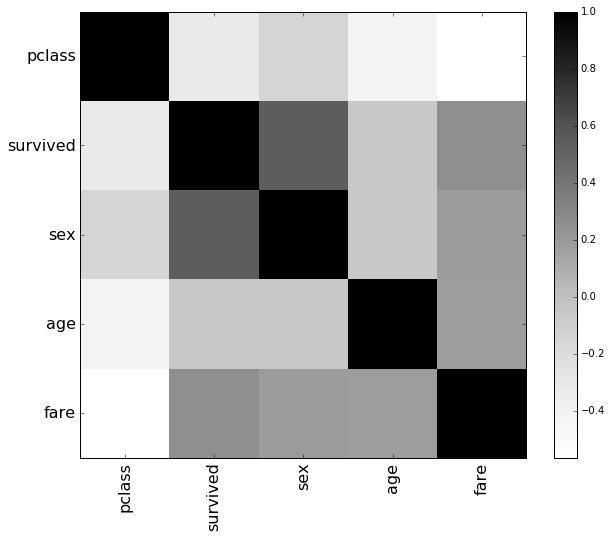

In [240]:
#Set figure size
plt.figure(figsize=(10,8))
#Specify we would like a heatmap
plt.imshow(correlation_matrix, interpolation = 'nearest', cmap = 'Greys')
#Specify the x and y labels
plt.xticks(range(5), titanic_df.columns, rotation = 90, fontsize = 16)
plt.yticks(range(5), titanic_df.columns, fontsize = 16)
#include a colorbar for reference
plt.colorbar()

# Let's dig into the data further

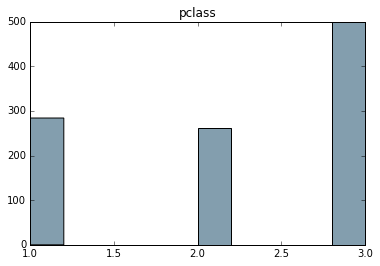

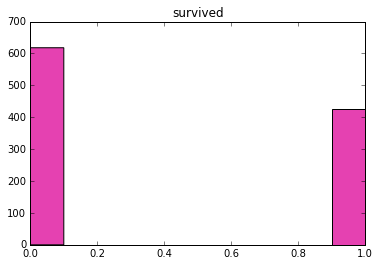

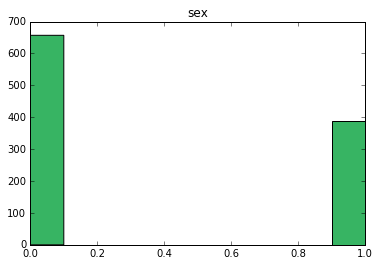

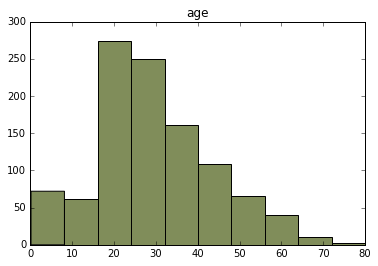

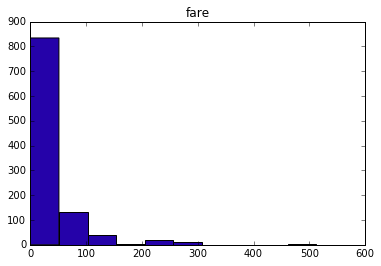

In [241]:
#for each column, draw a historgram of the distribution
for field in titanic_df.columns:
    plt.hist(titanic_df[field], color = np.random.rand(3,1))
    plt.title(field)
    plt.show()

# Normalize Data

In [242]:
for col in titanic_df.columns:
    if col != 'survived':
        titanic_df[col] = titanic_df[col].apply(lambda x: (x-np.mean(titanic_df[col]))/np.std(titanic_df[col]))

In [243]:
titanic_df

,pclass,survived,sex,age,fare
0,-0.245736,1.0,1.301268,-2.011855,-0.160415
1,-1.434601,0.0,-0.768481,2.374316,-0.191830
2,-0.245736,0.0,-0.768481,0.010302,-0.191830
3,0.943128,0.0,-0.768481,-0.337347,-0.516827
4,0.943128,0.0,1.301268,0.010302,-0.521613
5,0.943128,0.0,-0.768481,-0.128758,-0.254212
6,-0.245736,0.0,-0.768481,-0.824056,0.660863
7,0.943128,0.0,1.301268,0.636070,-0.097137
8,-1.434601,1.0,1.301268,-0.476407,1.374881
9,0.943128,0.0,-0.768481,-1.658414,-0.384884


# Train - Test Split

In [244]:
#define what fraction will be saved for testing
train_frac = 0.7
train_size = int(train_frac*len(titanic_df))

#get train and test dataframes
train_df = titanic_df[:train_size]
test_df = titanic_df[train_size:]

#Define train and test survival lists
surv_list = titanic_df.survived
train_surv_list = surv_list[:train_size]
test_surv_list = surv_list[train_size:]

# A First Prediction - KNN

In [245]:
#initialize the KNN
neigh = KNeighborsClassifier(n_neighbors=15)


In [246]:
for feat_list in [['sex'], ['age'], ['fare'], ['sex', 'age'], ['sex', 'fare'], ['age', 'fare'], ['sex', 'fare', 'age']]:
    #fit the model with the training data
    neigh.fit(train_df[feat_list].as_matrix(), train_surv_list) 
    pred = neigh.predict(test_df[feat_list].as_matrix())
    print feat_list
    print sum(((pred - test_surv_list) == 0))/float(len(pred))

['sex']
0.792993630573
['age']
0.601910828025
['fare']
0.649681528662
['sex', 'age']
0.799363057325
['sex', 'fare']
0.805732484076
['age', 'fare']
0.684713375796
['sex', 'fare', 'age']
0.799363057325


# What is the Best k?

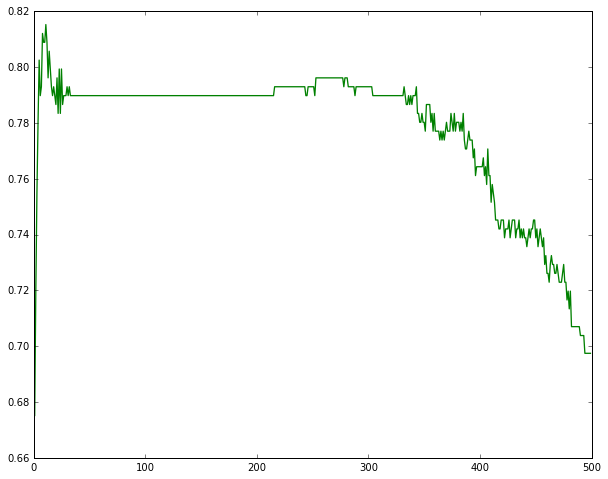

In [247]:
#Graph accuracy vs k for SKL KNN
acc_at_k = []
max_neigh = 500
feat_list = ['sex', 'age', 'fare']
for k in range(1,max_neigh):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(train_df[feat_list].as_matrix(), train_surv_list)  
    pred = neigh.predict(test_df[feat_list].as_matrix())
    acc = sum(((pred - test_surv_list) == 0))/float(len(pred))
    acc_at_k.append(acc)
plt.figure(figsize=(10,8))
plt.plot(range(1,max_neigh), acc_at_k, color = 'g', linewidth=1.3)

In [248]:
# What was our baseline accuracy anyways?

max(np.mean(surv_list), 1-np.mean(surv_list))

0.5913875598086125

# There's more than one way to measure success

In [249]:
#define precision and recall function
def precision_recall(pred, true):
    pred = np.asarray(pred)
    true = np.asarray(true)
    if (sum(pred+true == 2) + sum(pred-true == 1)) != 0:
        precision = float(sum(pred+true == 2))/(sum(pred+true == 2) + sum(pred-true == 1))
    else:
        precision = 0
    if (sum(pred+true == 2) + sum(pred-true == -1)) != 0:
        recall = float(sum(pred+true == 2))/(sum(pred+true == 2) + sum(pred-true == -1))
    else:
        recall = 0
    return (precision, recall)

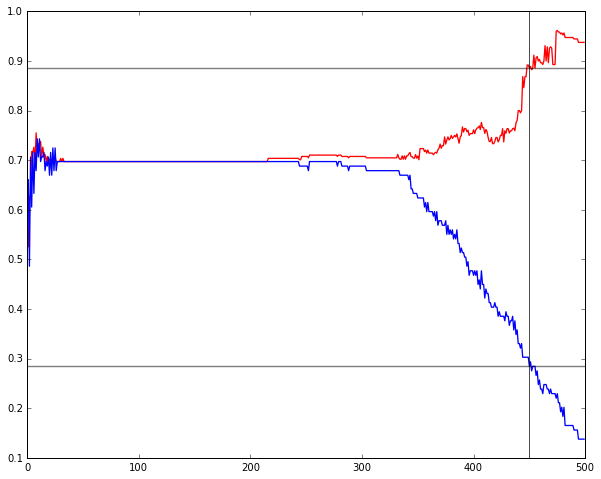

In [251]:
#Graph precision and recall vs k for SKL KNN
pr_at_k = []
max_neigh = 500
feat_list = ['sex', 'age', 'fare']
for k in range(1,max_neigh):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(train_df[feat_list].as_matrix(), train_surv_list)  
    pred = neigh.predict(test_df[feat_list].as_matrix())
    pr = precision_recall(pred, test_surv_list)
    pr_at_k.append(pr)
plt.figure(figsize=(10,8))
plt.plot(range(1,max_neigh), [i[0] for i in pr_at_k], color = 'r', linewidth=1.3)
plt.plot(range(1,max_neigh), [i[1] for i in pr_at_k], color = 'b', linewidth=1.3)

plt.axvline(450, color = 'k', alpha=0.7)
plt.axhline(pr_at_k[449][0], color='k', alpha=0.5, linewidth=1.4)
plt.axhline(pr_at_k[449][1], color='k', alpha=0.5, linewidth=1.4)

# A Magic Loop to save you some time!

In [252]:
def define_clfs_params():

    clfs = {
        'RF': RandomForestClassifier(n_estimators=50, n_jobs=-1),
        'LR': LogisticRegression(penalty='l1', C=1e5),
        'GB': GradientBoostingClassifier(learning_rate=0.05, subsample=0.5, max_depth=6, n_estimators=10),
        'ET': ExtraTreesClassifier(n_estimators=10, n_jobs=-1, criterion='entropy'),
        'KNN': KNeighborsClassifier(n_neighbors=3),
        'AB': AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=200)
        }

    grid = { 
    'RF':{'n_estimators': [10,100,1000], 'max_depth': [2,5], 'max_features': ['sqrt','log2'],'min_samples_split': [2,5,10]},
    'LR': { 'penalty': ['l1','l2'], 'C': [.1,1,10]},
    'GB': {'n_estimators': [10,100], 'learning_rate' : [0.01,0.05],'subsample' : [0.1,0.5], 'max_depth': [10,50]},
    'ET': { 'n_estimators': [10,100], 'criterion' : ['gini', 'entropy'] ,'max_depth': [10,20,50, 100], 'max_features': ['sqrt','log2'],'min_samples_split': [2,5,10]},
    'KNN' :{'n_neighbors': [50,100,200],'weights': ['uniform','distance'],'algorithm': ['auto','ball_tree','kd_tree']},
    'AB': { 'algorithm': ['SAMME','SAMME.R'], 'n_estimators': [1,10,100,1000,10000]}
    }
    
    return clfs, grid
    

In [253]:
def findsubsets(S,m):
    return set(itertools.combinations(S, m))

In [255]:
#A magical loop
all_feats = ['sex', 'age', 'fare']
feat_sizes = [1,2,3]
feat_combos = [findsubsets(all_feats, i) for i in feat_sizes]
models_to_run = ['RF', 'LR', 'GB', 'ET', 'KNN', 'AB']
feat_combos = [list(item) for sublist in [findsubsets(all_feats, i) for i in feat_sizes] for item in sublist]

clfs, grid = define_clfs_params()

try:
    results_df = pd.read_csv('results.csv')
    if 'Unnamed: 0' in results_df.columns:
        results_df = results_df.drop('Unnamed: 0', 1)
except:
    results_df = pd.DataFrame(columns=['model', 'params', 'feats', 'timestamp', 'accuracy', 'precision', 'recall'])

#go through each type of model
for clf_name in models_to_run:
    clf = clfs[clf_name]
    param_values = grid[clf_name]
    #go through all possible parameter combinations
    for p in ParameterGrid(param_values):
        #go through each feature set combination
        for feat_list in feat_combos:
            print clf_name, p, feat_list
            clf.set_params(**p)
            clf.fit(train_df[feat_list].as_matrix(), train_surv_list)   
            pred = clf.predict(test_df[feat_list].as_matrix())

            acc = sum(((pred - test_surv_list) == 0))/float(len(pred))
            p_r = precision_recall(pred, test_surv_list)

            result = pd.DataFrame()
            result['model'] = [str(clf_name)]
            result['params'] = [str(p)]
            result['feats'] = [str(feat_list)]
            result['timestamp'] = [datetime.now()]
            result['accuracy'] = [acc]
            result['precision'] = [p_r[0]]
            result['recall'] = [p_r[1]]

            results_df = results_df.append(result, ignore_index=True)
            results_df.to_csv('results.csv')
            print '----------------------------------------------'

RF {'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 10, 'max_depth': 2} ['sex']
----------------------------------------------
RF {'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 10, 'max_depth': 2} ['age']
----------------------------------------------
RF {'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 10, 'max_depth': 2} ['fare']
----------------------------------------------
RF {'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 10, 'max_depth': 2} ['age', 'fare']
----------------------------------------------
RF {'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 10, 'max_depth': 2} ['sex', 'fare']
----------------------------------------------
RF {'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 10, 'max_depth': 2} ['sex', 'age']
----------------------------------------------
RF {'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 10, 'max_depth': 2} ['sex', 'age', 'fare']
-------

Exception in thread Thread-3820:
Traceback (most recent call last):
  File "C:\Users\Ritvik\Anaconda2\lib\threading.py", line 801, in __bootstrap_inner
    self.run()
  File "C:\Users\Ritvik\Anaconda2\lib\threading.py", line 754, in run
    self.__target(*self.__args, **self.__kwargs)
  File "C:\Users\Ritvik\Anaconda2\lib\multiprocessing\pool.py", line 405, in _handle_results
    cache[job]._set(i, obj)
  File "C:\Users\Ritvik\Anaconda2\lib\multiprocessing\pool.py", line 572, in _set
    self._callback(self._value)
  File "C:\Users\Ritvik\Anaconda2\lib\site-packages\sklearn\externals\joblib\parallel.py", line 224, in __call__
    self.parallel.dispatch_next()
  File "C:\Users\Ritvik\Anaconda2\lib\site-packages\sklearn\externals\joblib\parallel.py", line 592, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "C:\Users\Ritvik\Anaconda2\lib\site-packages\sklearn\externals\joblib\parallel.py", line 658, in dispatch_one_batch
    self._dispatch(tasks)
  Fi

KeyboardInterrupt: 

# Beware of Machine Learning Pitfalls

## Train-Test Contamination

In [257]:
#WRONG WRONG WRONG!!!!!!
feat_list = ['sex', 'age', 'fare']
clfs = {
    'RF': RandomForestClassifier(),
    'LR': LogisticRegression(),
    'GB': GradientBoostingClassifier(),
    'ET': ExtraTreesClassifier(),
    'KNN': KNeighborsClassifier(),
    'AB': AdaBoostClassifier()
}

for clf_name in clfs.keys():
    print clf_name + ' - WRONG!'
    clf = clfs[clf_name]
    clf.fit(train_df[feat_list].as_matrix(), train_surv_list)   
    pred = clf.predict(train_df[feat_list].as_matrix())

    acc = sum(((pred - train_surv_list) == 0))/float(len(pred))
    print 'Accuracy: ', acc
    p_r = precision_recall(pred_auto, auto_surv_list)
    print 'Precision: ', p_r[0]
    print 'Recall: ', p_r[1]
    print '----------------------------------------------'

KNN - WRONG!
Accuracy:  0.824897400821
Precision:  0.406403940887
Recall:  0.386416861827
----------------------------------------------
AB - WRONG!
Accuracy:  0.789329685363
Precision:  0.406403940887
Recall:  0.386416861827
----------------------------------------------
RF - WRONG!
Accuracy:  0.958960328317
Precision:  0.406403940887
Recall:  0.386416861827
----------------------------------------------
LR - WRONG!
Accuracy:  0.768809849521
Precision:  0.406403940887
Recall:  0.386416861827
----------------------------------------------
GB - WRONG!
Accuracy:  0.856361149111
Precision:  0.406403940887
Recall:  0.386416861827
----------------------------------------------
ET - WRONG!
Accuracy:  0.979480164159
Precision:  0.406403940887
Recall:  0.386416861827
----------------------------------------------


## Predicting Something That's Already Known

In [258]:
#WRONG WRONG WRONG!!!!!!
feat_list = ['sex', 'age', 'fare', 'survived']
clfs = {
    'RF': RandomForestClassifier(),
    'LR': LogisticRegression(),
    'GB': GradientBoostingClassifier(),
    'ET': ExtraTreesClassifier(),
    'KNN': KNeighborsClassifier(),
    'AB': AdaBoostClassifier()
}

for clf_name in clfs.keys():
    print clf_name + ' - WRONG!'
    clf = clfs[clf_name]
    clf.fit(train_df[feat_list].as_matrix(), train_surv_list)   
    pred = clf.predict(train_df[feat_list].as_matrix())

    acc = sum(((pred - train_surv_list) == 0))/float(len(pred))
    print 'Accuracy: ', acc
    p_r = precision_recall(pred_auto, auto_surv_list)
    print 'Precision: ', p_r[0]
    print 'Recall: ', p_r[1]
    print '----------------------------------------------'

KNN - WRONG!
Accuracy:  0.997264021888
Precision:  0.406403940887
Recall:  0.386416861827
----------------------------------------------
AB - WRONG!
Accuracy:  1.0
Precision:  0.406403940887
Recall:  0.386416861827
----------------------------------------------
RF - WRONG!
Accuracy:  1.0
Precision:  0.406403940887
Recall:  0.386416861827
----------------------------------------------
LR - WRONG!
Accuracy:  1.0
Precision:  0.406403940887
Recall:  0.386416861827
----------------------------------------------
GB - WRONG!
Accuracy:  1.0
Precision:  0.406403940887
Recall:  0.386416861827
----------------------------------------------
ET - WRONG!
Accuracy:  1.0
Precision:  0.406403940887
Recall:  0.386416861827
----------------------------------------------


# What is the relative importance of our features?


([<matplotlib.axis.XTick at 0x12b5b6d8>,
 <a list of 3 Text xticklabel objects>)

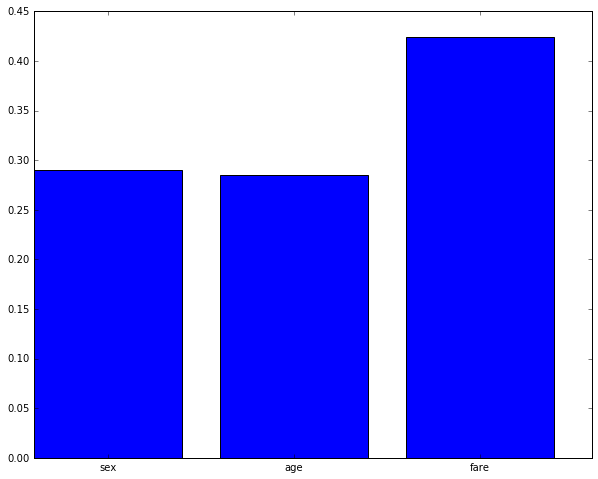

In [259]:
clf = RandomForestClassifier()
feat_list = ['sex', 'age', 'fare']
clf.fit(train_df[feat_list].as_matrix(), train_surv_list)   
plt.figure(figsize=(10,8))
plt.bar([1,2,3], clf.feature_importances_, tick_label = feat_list)
plt.xticks([1.4,2.4,3.4])

# Let's Quickly Explore the Continuous Side

In [260]:
#define what fraction will be saved for testing
train_frac = 0.7
train_size = int(train_frac*len(titanic_df))

#get train and test dataframes
train_df = titanic_df[:train_size]
test_df = titanic_df[train_size:]

#Define train and test age lists
age_list = titanic_df.age
train_age_list = age_list[:train_size]
test_age_list = age_list[train_size:]

In [261]:
reg_clfs = {
        'Linear': LinearRegression(),
        'Lasso': Lasso(),
        'Ridge': Ridge(),
        'Elastic': ElasticNet(),
        'LARS': Lars()
        
        }

In [262]:
#A magical loop
all_feats = ['sex', 'fare', 'pclass']
feat_sizes = [1,2,3]
feat_combos = [findsubsets(all_feats, i) for i in feat_sizes]
models_to_run = ['Linear', 'Lasso', 'Ridge', 'Elastic', 'LARS']
feat_combos = [list(item) for sublist in [findsubsets(all_feats, i) for i in feat_sizes] for item in sublist]

try:
    results_df = pd.read_csv('regression_results.csv')
    if 'Unnamed: 0' in results_df.columns:
        results_df = results_df.drop('Unnamed: 0', 1)
except:
    results_df = pd.DataFrame(columns=['model', 'feats', 'timestamp', 'root_mean_square_error'])

#go through each type of model
for clf_name in models_to_run:
    clf = reg_clfs[clf_name]
    #go through each feature set combination
    for feat_list in feat_combos:
        print clf_name, feat_list
        clf.fit(train_df[feat_list].as_matrix(), train_age_list)   
        pred = clf.predict(test_df[feat_list].as_matrix())
        
        rmse = np.sqrt(metrics.mean_squared_error(test_age_list, pred))

        result = pd.DataFrame()
        result['model'] = [str(clf_name)]
        result['feats'] = [str(feat_list)]
        result['timestamp'] = [datetime.now()]
        result['root_mean_square_error'] = rmse
        
        results_df = results_df.append(result, ignore_index=True)
        results_df.to_csv('regression_results.csv')
        print '----------------------------------------------'

Linear ['sex']
----------------------------------------------
Linear ['fare']
----------------------------------------------
Linear ['pclass']
----------------------------------------------
Linear ['fare', 'pclass']
----------------------------------------------
Linear ['sex', 'pclass']
----------------------------------------------
Linear ['sex', 'fare']
----------------------------------------------
Linear ['sex', 'fare', 'pclass']
----------------------------------------------
Lasso ['sex']
----------------------------------------------
Lasso ['fare']
----------------------------------------------
Lasso ['pclass']
----------------------------------------------
Lasso ['fare', 'pclass']
----------------------------------------------
Lasso ['sex', 'pclass']
----------------------------------------------
Lasso ['sex', 'fare']
----------------------------------------------
Lasso ['sex', 'fare', 'pclass']
----------------------------------------------
Ridge ['sex']
-----------------------